``` Shahar_Ariel_314868977 ```

In [ ]:
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install scikit-learn
!pip install seaborn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import feature_selection
from sklearn import naive_bayes

In [16]:
df = pd.read_csv('penguins.csv')
df=df.dropna()
gnb = naive_bayes.GaussianNB()
sfs = feature_selection.SequentialFeatureSelector(gnb, n_features_to_select=2)
mapping_species = {'Adelie' : 1,'Chinstrap' : 2,'Gentoo' : 3}
mapping_island = {'Torgersen' : 1,'Biscoe' : 2,'Dream' : 3}
df_clone = df.replace({'species': mapping_species, 'island': mapping_island})
x_pen = df_clone.drop('sex', axis=1)
y_pen = df_clone['sex']
sfs.fit(x_pen,y_pen)

SequentialFeatureSelector(estimator=GaussianNB(), n_features_to_select=2)

In [17]:
feat = sfs.get_feature_names_out()
print(feat)

['bill_depth_mm' 'body_mass_g']


from the func fit we can conclude that bill depth and body mass are the best features

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pen, y_pen,random_state=1,test_size=0.2)

C:\Users\Shaha\Desktop\Dev\Pyhton\PythonAss2\venv\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


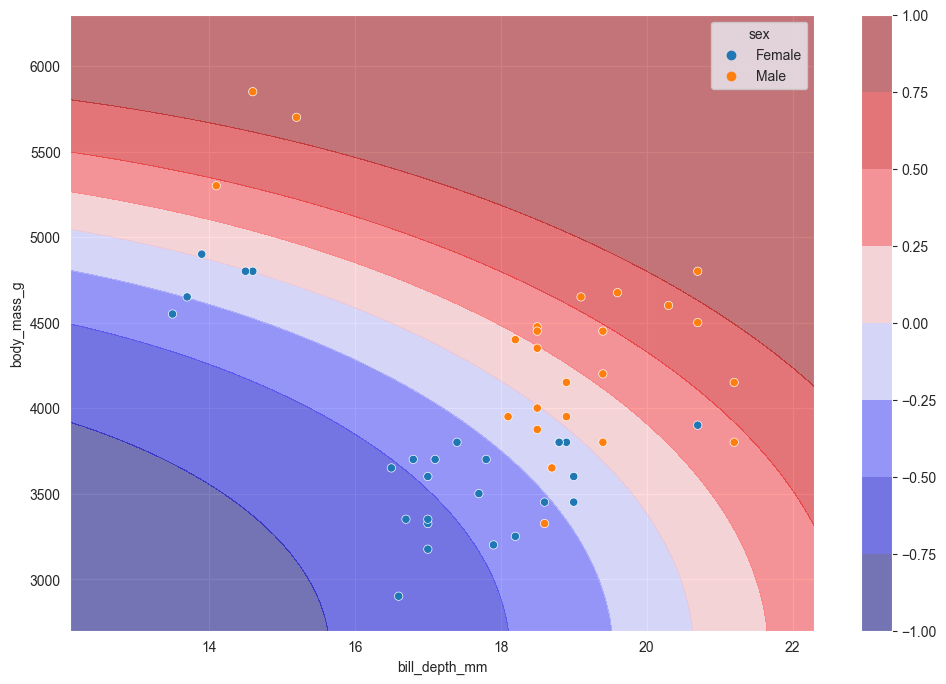

In [18]:
opt_feat1 = feat[0]
opt_feat2 = feat[1]
target = 'sex'
clf = gnb.fit(x_train[feat], y_train)
prob = len(clf.classes_) == 2
y_pred = clf.predict(x_train[feat])
misclassified_points = np.where(y_train != y_pred)

hue_order = clf.classes_

x_min, x_max = x_pen.loc[:,feat[0]].min() - 1, x_pen.loc[:,feat[0]].max() + 1
y_min, y_max = x_pen.loc[:,feat[1]].min() - 1, x_pen.loc[:,feat[1]].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
if prob:
    Z = Z[:,1]-Z[:,0]
else:
    colors = "Set1"
    Z = np.argmax(Z, axis=1)

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='seismic', alpha=0.5)
plt.colorbar()
if not prob:
    plt.clim(0,len(clf.classes_)+3)
sns.scatterplot(data=df_clone.iloc[misclassified_points], x=feat[0], y=feat[1], hue=target,hue_order=hue_order)
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.show()

In [8]:
clf.score(x_test[feat],y_test)

0.8059701492537313

task 2:

In [20]:
df['class'] = df['sex'] + ' ' + df['species']
print(df['class'])

0        Male Adelie
1      Female Adelie
2      Female Adelie
4      Female Adelie
5        Male Adelie
           ...      
338    Female Gentoo
340    Female Gentoo
341      Male Gentoo
342    Female Gentoo
343      Male Gentoo
Name: class, Length: 333, dtype: object


In [21]:
mapping_species = {'Adelie' : 1,'Chinstrap' : 2,'Gentoo' : 3}
mapping_island = {'Torgersen' : 1,'Biscoe' : 2,'Dream' : 3}
mapping_sex = {'Male' : 1,'Female' : 2}
df_clone = df.replace({'species': mapping_species, 'island': mapping_island, 'sex': mapping_sex})
x_pen = df_clone.drop('class',axis = 1)
y_pen = df_clone['class']
sfs.fit(x_pen,y_pen)
feat = sfs.get_feature_names_out()
print(feat)

['species' 'body_mass_g']


C:\Users\Shaha\Desktop\Dev\Pyhton\PythonAss2\venv\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


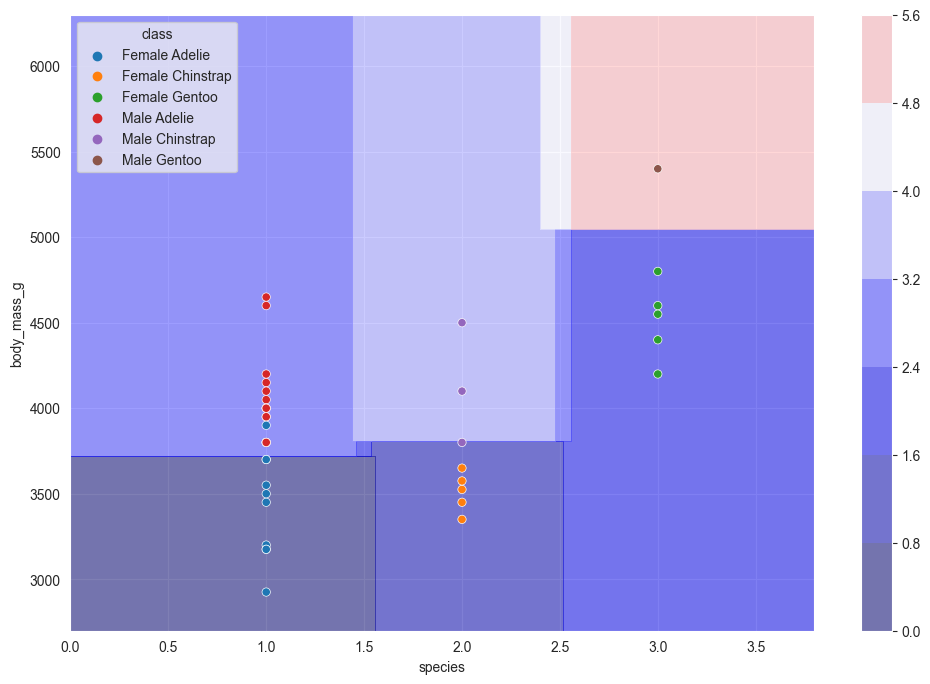

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x_pen, y_pen,random_state=1,test_size=0.2)
target = 'class'
clf = gnb.fit(x_train[feat], y_train)
prob = len(clf.classes_) == 2
y_pred = clf.predict(x_train[feat])
misclassified_points = np.where(y_train != y_pred)

hue_order = clf.classes_

x_min, x_max = x_pen.loc[:,feat[0]].min() - 1, x_pen.loc[:,feat[0]].max() + 1
y_min, y_max = x_pen.loc[:,feat[1]].min() - 1, x_pen.loc[:,feat[1]].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
if prob:
    Z = Z[:,1]-Z[:,0]
else:
    colors = "Set1"
    Z = np.argmax(Z, axis=1)

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='seismic', alpha=0.5)
plt.colorbar()
if not prob:
    plt.clim(0,len(clf.classes_)+3)
sns.scatterplot(data=df_clone.iloc[misclassified_points], x=feat[0], y=feat[1], hue=target,hue_order=hue_order)
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.show()

In [24]:
clf.score(x_test[feat],y_test)


0.8507462686567164